In [ ]:
# Vari√°veis de entrada:

# X1: √Årea da parede externa
# X2: √Årea do teto
# X3: √Årea do piso
# X4: Altura
# X5: Orienta√ß√£o
# X6: Tipo de vidro
# X7: Distribui√ß√£o do vidro
# X8: Transmit√¢ncia do vidro

# Vari√°veis de sa√≠da:

# Y1: Carga t√©rmica  de aquecimento
# Y2: Carga t√©rmica de resfriamento

# Instala√ß√£o de Pacotes

In [1]:
!pip install prince scipy imbalanced-learn seaborn scikit-learn statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prince
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.interpolate import splrep, BSpline
from sklearn.covariance import EllipticEnvelope
from sklearn.feature_selection import chi2, SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.ensemble import IsolationForest
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 417.8/417.8 kB 5.9 MB/s eta 0:00:00


# Carregamento e Pr√©-processamento

In [2]:
# Carregar dados
df = pd.read_excel('ENB2012_data.xlsx', sheet_name='Œ¶œçŒªŒªŒø1', engine='openpyxl')

# Mapeamento de vari√°veis
input_features = {
    'X1': '√Årea Parede Externa',
    'X2': '√Årea Teto',
    'X3': '√Årea Piso',
    'X4': 'Altura',
    'X5': 'Orienta√ß√£o',
    'X6': 'Tipo de Vidro',
    'X7': 'Distribui√ß√£o Vidro',
    'X8': 'Transmit√¢ncia Vidro'
}

output_targets = {
    'Y1': 'Carga T√©rmica Aquecimento',
    'Y2': 'Carga T√©rmica Resfriamento'
}

df = df.rename(columns={**input_features, **output_targets})

In [ ]:
df

√Årea Parede Externa  √Årea Teto  √Årea Piso  Altura  Orienta√ß√£o  \
0                   0.98      514.5      294.0  110.25         7.0   
1                   0.98      514.5      294.0  110.25         7.0   
2                   0.98      514.5      294.0  110.25         7.0   
3                   0.98      514.5      294.0  110.25         7.0   
4                   0.90      563.5      318.5  122.50         7.0   
..                   ...        ...        ...     ...         ...   
763                 0.64      784.0      343.0  220.50         3.5   
764                 0.62      808.5      367.5  220.50         3.5   
765                 0.62      808.5      367.5  220.50         3.5   
766                 0.62      808.5      367.5  220.50         3.5   
767                 0.62      808.5      367.5  220.50         3.5   

     Tipo de Vidro  Distribui√ß√£o Vidro  Transmit√¢ncia Vidro  \
0                2                 0.0                    0   
1                3                 0.0                    0   
2                4                 0.0                    0   
3                5                 0.0                    0   
4                2                 0.0                    0   
..             ...                 ...                  ...   
763              5                 0.4                    5   
764              2                 0.4                    5   
765              3                 0.4                    5   
766              4                 0.4                    5   
767              5                 0.4                    5   

     Carga T√©rmica Aquecimento  Carga T√©rmica Resfriamento  
0                        15.55                       21.33  
1                        15.55                       21.33  
2                        15.55                       21.33  
3                        15.55                       21.33  
4                        20.84                       28.28  
..                         ...                         ...  
763                      17.88                       21.40  
764                      16.54                       16.88  
765                      16.44                       17.11  
766                      16.48                       16.61  
767                      16.64                       16.03  

[768 rows x 10 columns]

# An√°lise Explorat√≥ria


[3.1] Estat√≠sticas Descritivas:
                            count    mean    std     min     25%     50%  \
√Årea Parede Externa         768.0    0.76   0.11    0.62    0.68    0.75   
√Årea Teto                   768.0  671.71  88.09  514.50  606.38  673.75   
√Årea Piso                   768.0  318.50  43.63  245.00  294.00  318.50   
Altura                      768.0  176.60  45.17  110.25  140.88  183.75   
Orienta√ß√£o                  768.0    5.25   1.75    3.50    3.50    5.25   
Tipo de Vidro               768.0    3.50   1.12    2.00    2.75    3.50   
Distribui√ß√£o Vidro          768.0    0.23   0.13    0.00    0.10    0.25   
Transmit√¢ncia Vidro         768.0    2.81   1.55    0.00    1.75    3.00   
Carga T√©rmica Aquecimento   768.0   22.31  10.09    6.01   12.99   18.95   
Carga T√©rmica Resfriamento  768.0   24.59   9.51   10.90   15.62   22.08   

                               75%     max  
√Årea Parede Externa           0.83    0.98  
√Årea Teto                  

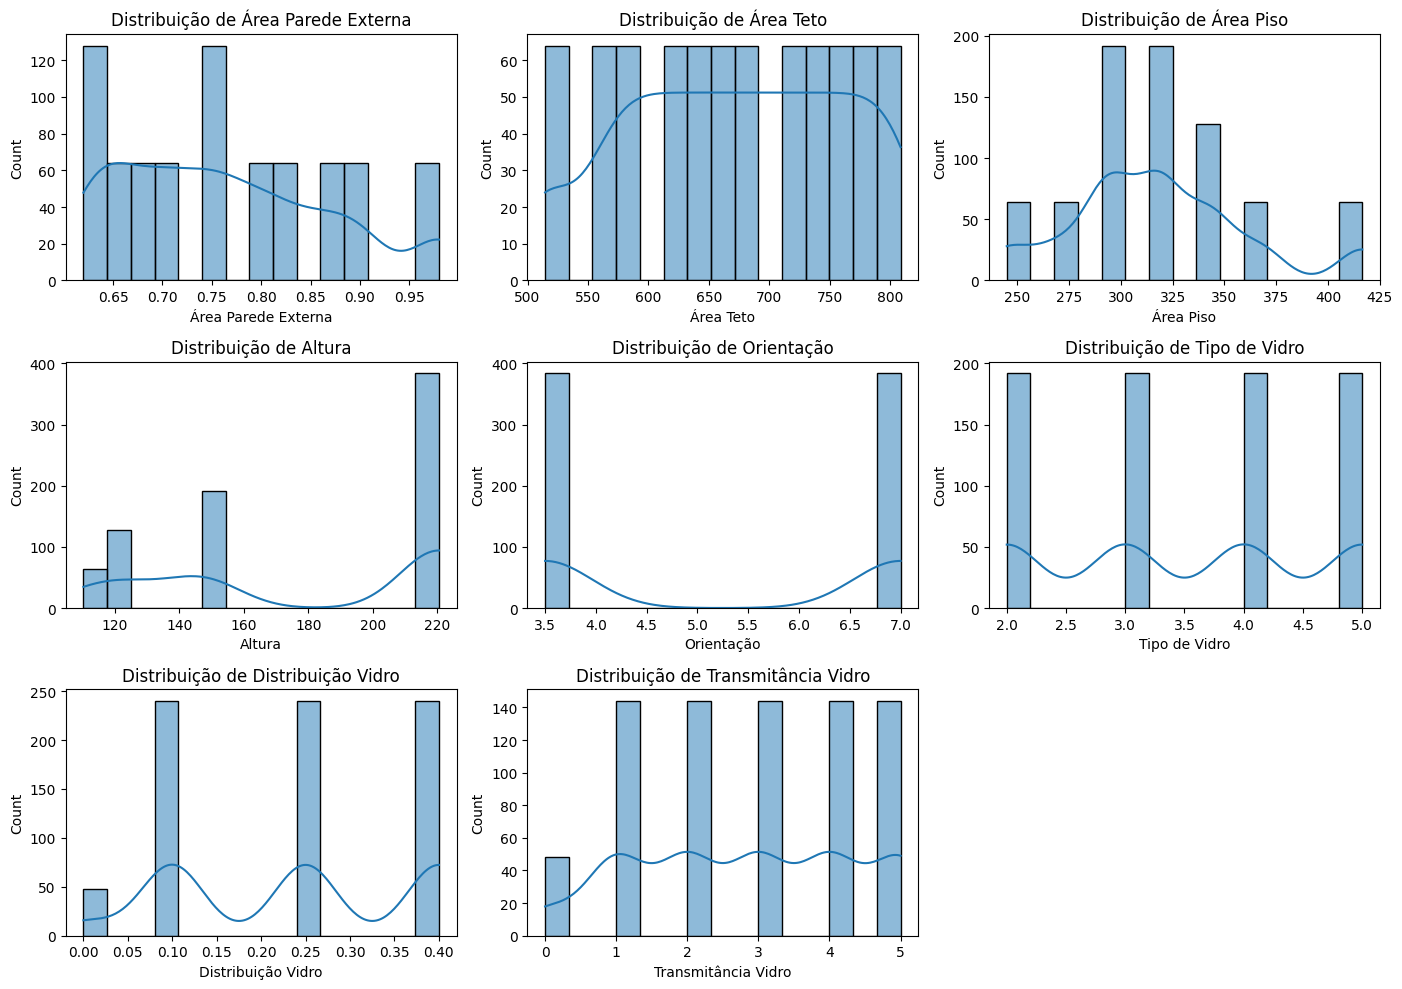

In [3]:
# Estat√≠sticas Descritivas
print("\n[3.1] Estat√≠sticas Descritivas:")
print(df.describe().transpose().round(2))

# Histogramas
plt.figure(figsize=(14,10))
for i, col in enumerate(input_features.values(), 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True, bins=15)
    plt.title(f'Distribui√ß√£o de {col}')
plt.tight_layout()
plt.show()

# An√°lise de Correla√ß√£o

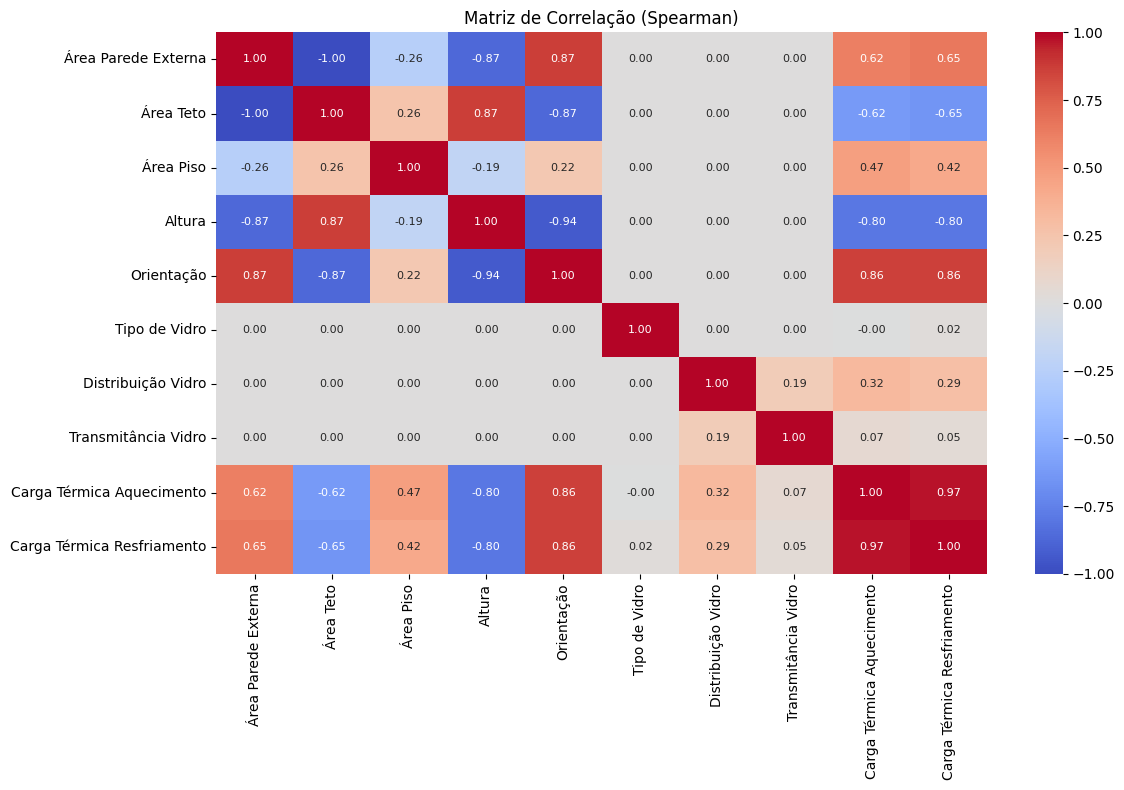

In [4]:
# Matrizes de Correla√ß√£o
methods = ['spearman']
for method in methods:
    plt.figure(figsize=(12,8))
    sns.heatmap(df.corr(method=method),
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt=".2f",
                annot_kws={"size":8})
    plt.title(f'Matriz de Correla√ß√£o ({method.capitalize()})')
    plt.tight_layout()
    plt.show()

Interpreta√ß√£o:

Fortes Correla√ß√µes Positivas
- **Carga T√©rmica de Aquecimento e Resfriamento**

Ambientes que exigem mais energia para aquecer tamb√©m tendem a exigir mais para resfriar ‚Äî indicativo de ambientes com baixa efici√™ncia t√©rmica ou exposi√ß√£o solar intensa.

- **Orienta√ß√£o com Carga T√©rmica (Aquecimento e Resfriamento)**

A orienta√ß√£o do ambiente (provavelmente em rela√ß√£o ao sol) afeta fortemente a carga t√©rmica. Ambientes mais expostos ao sol (ex: norte ou oeste) tendem a demandar mais energia.

- **√Årea Parede Externa com Carga T√©rmica**

Ambientes com maior √°rea de parede externa t√™m mais troca t√©rmica com o exterior ‚Üí maior demanda t√©rmica.

Fortes Correla√ß√µes Negativas
- **Altura com Carga T√©rmica (Aquecimento e Resfriamento)**
Ambientes mais altos tendem a demandar menos energia t√©rmica. Isso pode se dever √† maior dispers√£o de calor em p√©-direitos mais altos.

- **√Årea Teto com Carga T√©rmica**
Ambientes com teto maior talvez sejam mais abertos ou bem ventilados, reduzindo demanda t√©rmica


# An√°lise de Outliers

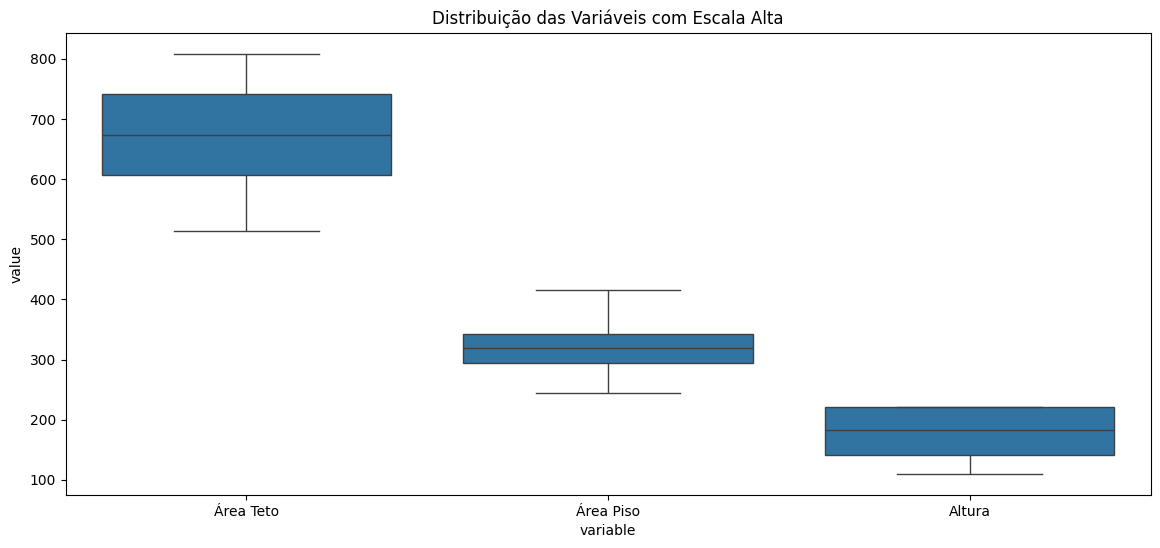

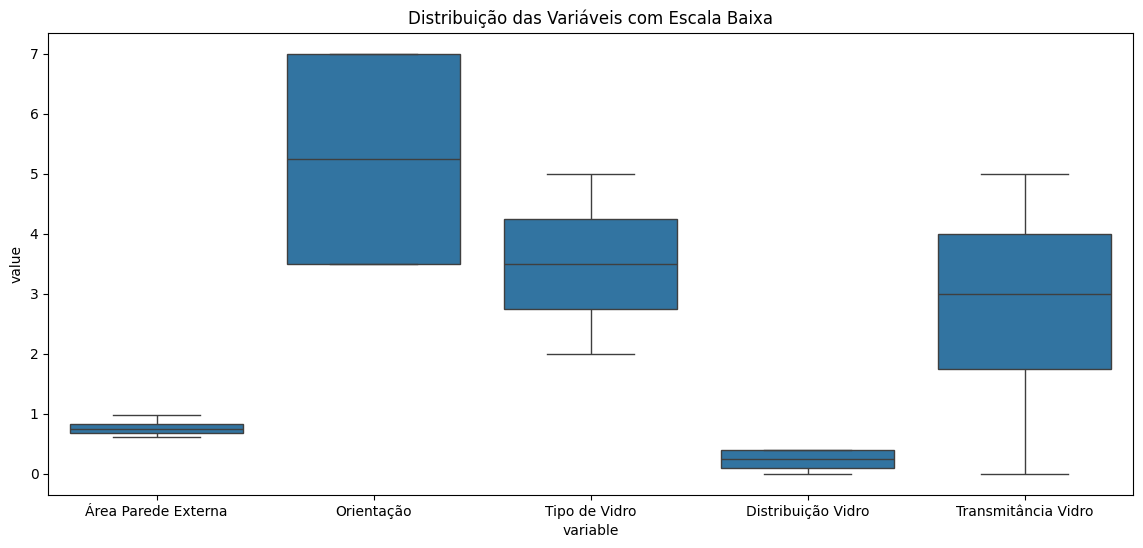

In [5]:
# Boxplots

# Separar vari√°veis maiores e menores
high_range = ['√Årea Teto', '√Årea Piso', 'Altura']
low_range = ['√Årea Parede Externa', 'Orienta√ß√£o', 'Tipo de Vidro', 'Distribui√ß√£o Vidro', 'Transmit√¢ncia Vidro']

# Plotar high range
plt.figure(figsize=(14, 6))
df_melt_high = pd.melt(df[high_range])
sns.boxplot(x='variable', y='value', data=df_melt_high)
plt.title('Distribui√ß√£o das Vari√°veis com Escala Alta')
plt.show()

# Plotar low range
plt.figure(figsize=(14, 6))
df_melt_low = pd.melt(df[low_range])
sns.boxplot(x='variable', y='value', data=df_melt_low)
plt.title('Distribui√ß√£o das Vari√°veis com Escala Baixa')
plt.show()

# An√°lise de Componentes Principais (PCA)

In [17]:
# Inicializa√ß√£o do PCA com engine sklearn
pca = prince.PCA(
    n_components=8,
    n_iter=10,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=200
)

# Ajuste do modelo ao dataframe
pca = pca.fit(df)

# Resumo dos autovalores e vari√¢ncia explicada
summary = pca.eigenvalues_summary
print(summary)


          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              5.223        52.23%                     52.23%
1              1.533        15.33%                     67.56%
2              1.219        12.19%                     79.75%
3              1.000        10.00%                     89.75%
4              0.805         8.05%                     97.80%
5              0.163         1.63%                     99.43%
6              0.033         0.33%                     99.76%
7              0.019         0.19%                     99.96%


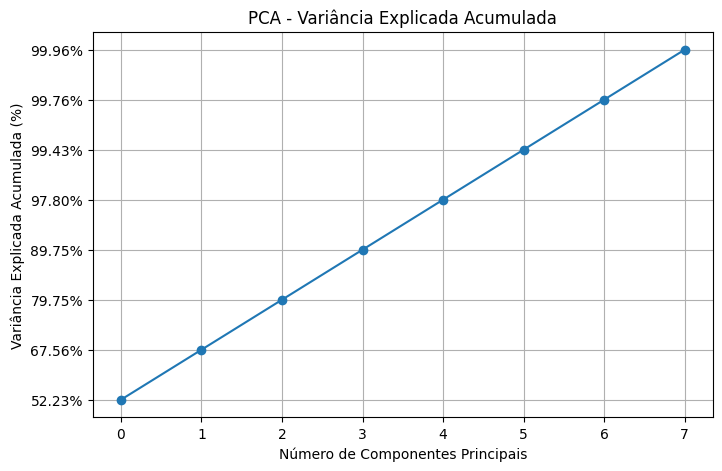

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(summary['% of variance (cumulative)'], marker='o')
plt.xlabel('N√∫mero de Componentes Principais')
plt.ylabel('Vari√¢ncia Explicada Acumulada (%)')
plt.title('PCA - Vari√¢ncia Explicada Acumulada')
plt.grid(True)
plt.show()

In [16]:
pca.scree_plot()

alt.Chart(...)

In [11]:
pca.column_correlations

component                          0         1         2         3         4  \
variable                                                                       
√Årea Parede Externa         0.864412  0.468090 -0.106179 -0.000426  0.005076   
√Årea Teto                  -0.885906 -0.448464  0.100358  0.000446 -0.003463   
√Årea Piso                   0.242876 -0.847338  0.411617  0.007436  0.124533   
Altura                     -0.981180 -0.028086 -0.100931 -0.003157 -0.063521   
Orienta√ß√£o                  0.980749  0.002379  0.102184  0.002894  0.056331   
Tipo de Vidro               0.002557 -0.006169  0.001302 -0.999964  0.003420   
Distribui√ß√£o Vidro          0.105819 -0.376667 -0.713841  0.000063 -0.570859   
Transmit√¢ncia Vidro         0.035383 -0.233115 -0.704699  0.002906  0.669162   
Carga T√©rmica Aquecimento   0.919032 -0.336619 -0.033568  0.006359 -0.069492   
Carga T√©rmica Resfriamento  0.922063 -0.291222  0.013871 -0.011253 -0.059309   

component                          5         6         7  
variable                                                  
√Årea Parede Externa        -0.124730 -0.069281  0.002702  
√Årea Teto                   0.053053  0.005838  0.000302  
√Årea Piso                  -0.193427 -0.023396 -0.006623  
Altura                      0.145152  0.016992  0.003493  
Orienta√ß√£o                  0.004602  0.154686 -0.016301  
Tipo de Vidro              -0.003374  0.000748  0.001529  
Distribui√ß√£o Vidro         -0.105298  0.016357 -0.010947  
Transmit√¢ncia Vidro        -0.003056  0.000825 -0.002817  
Carga T√©rmica Aquecimento   0.155402 -0.017876  0.107705  
Carga T√©rmica Resfriamento  0.225737 -0.053821 -0.085435

In [18]:
 pca.column_contributions_.style.format('{:.0%}')

# Feature selection

- M√©todo Chi2

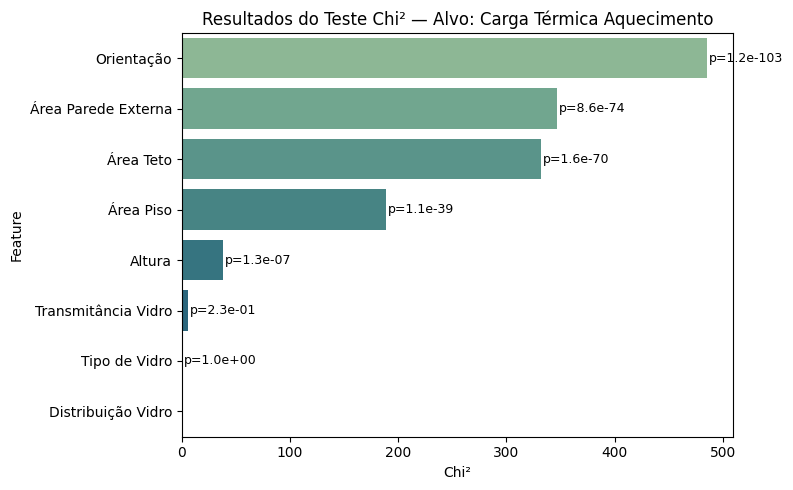

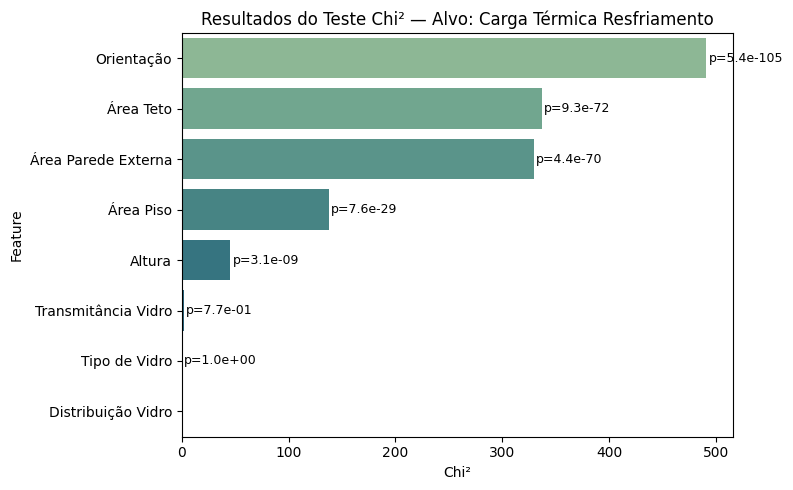

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import chi2

# 1. Discretizar vari√°veis cont√≠nuas
cont_vars = [
    '√Årea Parede Externa', '√Årea Teto', '√Årea Piso', 'Altura',
    'Carga T√©rmica Aquecimento', 'Carga T√©rmica Resfriamento'
]
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df_disc = df.copy()
df_disc[cont_vars] = discretizer.fit_transform(df[cont_vars])

# 2. Tratar vari√°veis categ√≥ricas
categorical_vars = ['Orienta√ß√£o', 'Tipo de Vidro', 'Transmit√¢ncia Vidro','Distribui√ß√£o Vidro']
df_disc[categorical_vars] = df_disc[categorical_vars].astype(int)

# 3. Fun√ß√£o para aplicar Chi¬≤
def run_chi2_analysis(df, features, target_label, bins=5):
    df = df.copy()
    df['Y_binned'] = pd.qcut(df[target_label].rank(method='first'), q=bins, labels=False, duplicates='drop')
    X = df[features]
    y = df['Y_binned']

    chi2_vals, p_vals = chi2(X, y)
    result = pd.DataFrame({
        'Feature': features,
        'Chi2': chi2_vals,
        'p-value': p_vals
    }).sort_values(by='Chi2', ascending=False).reset_index(drop=True)

    return result

# 4. Executar an√°lises para dois alvos
features = cont_vars[:4] + categorical_vars  # exclui os alvos das features
resultado_aquec = run_chi2_analysis(df_disc, features, 'Carga T√©rmica Aquecimento')
resultado_resfri = run_chi2_analysis(df_disc, features, 'Carga T√©rmica Resfriamento')

# 5. Fun√ß√£o para plotar como na imagem
def plot_chi2_result(df_result, titulo):
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_result, x='Chi2', y='Feature', palette='crest')

    for i, row in df_result.iterrows():
        plt.text(row['Chi2'] + 2, i, f"p={row['p-value']:.1e}", va='center', fontsize=9)

    plt.title(f"Resultados do Teste Chi¬≤ ‚Äî Alvo: {titulo}")
    plt.xlabel("Chi¬≤")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# 6. Plotar ambos
plot_chi2_result(resultado_aquec, "Carga T√©rmica Aquecimento")
plot_chi2_result(resultado_resfri, "Carga T√©rmica Resfriamento")


- LASSO

In [ ]:
# Verificar compatibilidade da vers√£o do sklearn
if version.parse(sklearn_version) >= version.parse("1.2"):
    encoder = OneHotEncoder(drop='first', sparse_output=False)
else:
    encoder = OneHotEncoder(drop='first', sparse=False)

# === 1. DEFINI√á√ïES INICIAIS ===

# Alvo
target = 'Carga T√©rmica Aquecimento'
y = df[target]

# Vari√°veis cont√≠nuas
num_features = ['√Årea Parede Externa', '√Årea Teto', '√Årea Piso', 'Altura']

# Vari√°veis categ√≥ricas num√©ricas (apesar de num√©ricas, s√£o qualitativas)
cat_features = ['Orienta√ß√£o', 'Tipo de Vidro', 'Distribui√ß√£o Vidro', 'Transmit√¢ncia Vidro']

# Dados preditores
X = df[num_features + cat_features]

# === 2. PIPELINE: SCALER + ONE-HOT + LASSO ===

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', encoder, cat_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectFromModel(LassoCV(cv=5, random_state=42)))
])

# Ajustar pipeline
pipeline.fit(X, y)

# === 3. EXTRA√á√ÉO DAS FEATURES SELECIONADAS ===

# Obter nomes das features transformadas
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(cat_features)
all_transformed_features = np.concatenate([num_features, ohe_feature_names])

# M√°scara de sele√ß√£o do LASSO
mask = pipeline.named_steps['selector'].get_support()
selected_expanded = all_transformed_features[mask]
removed_expanded = all_transformed_features[~mask]

# === 4. AGRUPAR NOMES ORIGINAIS ===

# Mapeamento de categorias para colunas expandidas
cat_map = defaultdict(list)
for name in ohe_feature_names:
    for col in cat_features:
        if name.startswith(col + "_"):
            cat_map[col].append(name)

# Separar selecionadas/removidas em nomes originais
selected_final = set()
removed_final = set()

# Num√©ricas
for num in num_features:
    if num in selected_expanded:
        selected_final.add(num)
    else:
        removed_final.add(num)

# Categ√≥ricas
for cat in cat_features:
    cols = cat_map.get(cat, [])
    if len(cols) == 0:
        removed_final.add(cat)
    elif any(col in selected_expanded for col in cols):
        selected_final.add(cat)
    else:
        removed_final.add(cat)

# === 5. RESULTADO FINAL ===

print("‚úÖ Vari√°veis selecionadas com LASSO:")
print(sorted(selected_final))

print("\n‚ùå Vari√°veis removidas com LASSO:")
print(sorted(removed_final))


‚úÖ Vari√°veis selecionadas com LASSO:
['Altura', 'Orienta√ß√£o', 'Tipo de Vidro', 'Transmit√¢ncia Vidro', '√Årea Parede Externa', '√Årea Piso', '√Årea Teto']

‚ùå Vari√°veis removidas com LASSO:
['Distribui√ß√£o Vidro']


Colunas: ['√Årea Parede Externa', '√Årea Teto', '√Årea Piso', 'Altura', 'Orienta√ß√£o', 'Tipo de Vidro', 'Distribui√ß√£o Vidro', 'Transmit√¢ncia Vidro', 'Carga T√©rmica Aquecimento', 'Carga T√©rmica Resfriamento', 'target']

Coeficientes LASSO:
 √Årea Parede Externa    0.000000
√Årea Teto             -0.000000
√Årea Piso              1.643722
Altura                -0.000000
Orienta√ß√£o             7.726793
Tipo de Vidro         -0.000000
Distribui√ß√£o Vidro     0.000000
Transmit√¢ncia Vidro    0.100941
target                 0.000000
dtype: float64


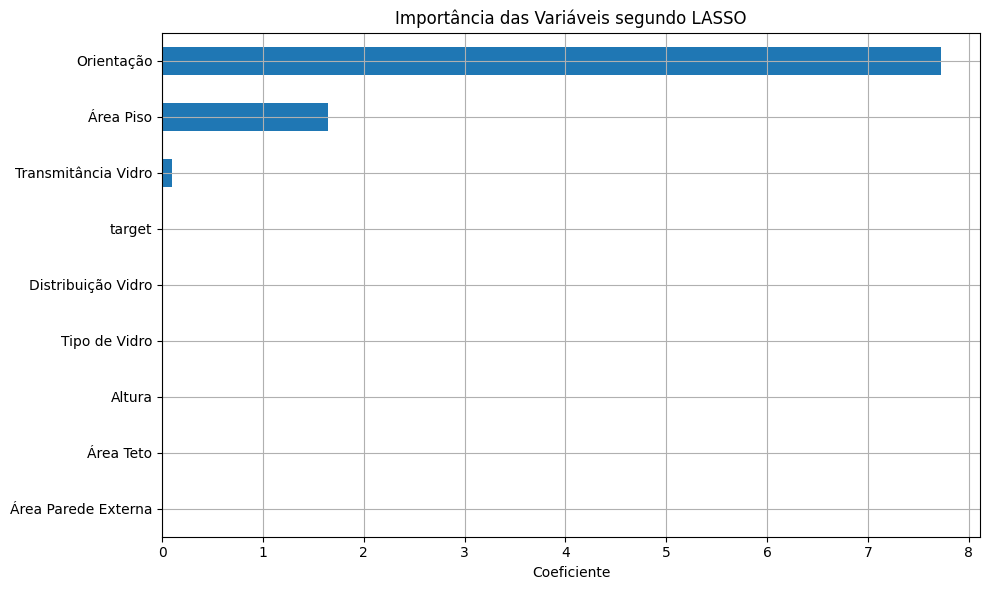

Melhor valor de alpha (penaliza√ß√£o): 0.780050927288694


In [ ]:

# Verifica os nomes das colunas
print("Colunas:", df.columns.tolist())

# Separando vari√°veis independentes (X) e dependente (y)
X = df.drop(columns=['Carga T√©rmica Aquecimento', 'Carga T√©rmica Resfriamento'])
y = df['Carga T√©rmica Aquecimento']

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso com valida√ß√£o cruzada para escolher alpha ideal
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# Exibindo os coeficientes das vari√°veis
coef = pd.Series(lasso.coef_, index=X.columns)
print("\nCoeficientes LASSO:\n", coef)

# Plotando os coeficientes
plt.figure(figsize=(10, 6))
coef.sort_values().plot(kind='barh')
plt.title("Import√¢ncia das Vari√°veis segundo LASSO")
plt.xlabel("Coeficiente")
plt.grid(True)
plt.tight_layout()
plt.show()

# Melhor valor de alpha
print(f"Melhor valor de alpha (penaliza√ß√£o): {lasso.alpha_}")


In [ ]:
from collections import defaultdict

# Mapeia colunas codificadas de volta para a original
cat_map = defaultdict(list)
for name in ohe_feature_names:
    for col in cat_features:
        if name.startswith(col + "_"):
            cat_map[col].append(name)

# Mostrar mapeamento real das categorias para colunas codificadas
print("\nüìå Mapeamento OneHot:")
for k, v in cat_map.items():
    print(f"{k} -> {v}")

# Iniciar listas finais
selected_final = set()
removed_final = set()

# Avaliar vari√°veis num√©ricas
for num in num_features:
    if num in selected_expanded:
        selected_final.add(num)
    else:
        removed_final.add(num)

# Avaliar vari√°veis categ√≥ricas
for cat in cat_features:
    cols = cat_map.get(cat, [])  # retorna [] se n√£o houver colunas
    if len(cols) == 0:
        # Nenhuma coluna codificada foi criada ‚Äî tratamos como removida
        print(f"‚ö†Ô∏è '{cat}' n√£o gerou colunas com OneHotEncoder ‚Äî ser√° considerado REMOVIDO.")
        removed_final.add(cat)
    elif all(col not in selected_expanded for col in cols):
        # Todas as subfeatures foram removidas
        print(f"‚ÑπÔ∏è Todas as colunas de '{cat}' foram removidas.")
        removed_final.add(cat)
    else:
        # Pelo menos uma subfeature foi selecionada
        print(f"‚úÖ Pelo menos uma coluna de '{cat}' foi selecionada.")
        selected_final.add(cat)

# Resultado final
print("\n‚úÖ Vari√°veis selecionadas com LASSO:")
print(sorted(selected_final))

print("\n‚ùå Vari√°veis removidas com LASSO:")
print(sorted(removed_final))





üìå Mapeamento OneHot:
Orienta√ß√£o -> ['Orienta√ß√£o_7']
Tipo de Vidro -> ['Tipo de Vidro_3', 'Tipo de Vidro_4', 'Tipo de Vidro_5']
Transmit√¢ncia Vidro -> ['Transmit√¢ncia Vidro_1', 'Transmit√¢ncia Vidro_2', 'Transmit√¢ncia Vidro_3', 'Transmit√¢ncia Vidro_4', 'Transmit√¢ncia Vidro_5']
‚úÖ Pelo menos uma coluna de 'Orienta√ß√£o' foi selecionada.
‚úÖ Pelo menos uma coluna de 'Tipo de Vidro' foi selecionada.
‚ö†Ô∏è 'Distribui√ß√£o Vidro' n√£o gerou colunas com OneHotEncoder ‚Äî ser√° considerado REMOVIDO.
‚úÖ Pelo menos uma coluna de 'Transmit√¢ncia Vidro' foi selecionada.

‚úÖ Vari√°veis selecionadas com LASSO:
['Altura', 'Orienta√ß√£o', 'Tipo de Vidro', 'Transmit√¢ncia Vidro', '√Årea Parede Externa', '√Årea Piso', '√Årea Teto']

‚ùå Vari√°veis removidas com LASSO:
['Distribui√ß√£o Vidro']


In [ ]:
# Define X e y
x = df[features]
y = df['Carga T√©rmica Aquecimento']  # ou df['Y1'] se preferir

# 1. Padronizar as vari√°veis preditoras
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 2. Aplicar LASSO para regress√£o
lasso_selector = SelectFromModel(
    Lasso(alpha=0.1, random_state=42)
)
lasso_selector.fit(x_scaled, y)

# 3. Vari√°veis selecionadas e removidas
selected_features = x.columns[lasso_selector.get_support()]
removed_features = x.columns[~lasso_selector.get_support()]

# 4. Exibir os resultados
print("‚úÖ Vari√°veis selecionadas com LASSO (regress√£o):")
print(selected_features.tolist())

print("\n‚ùå Vari√°veis removidas com LASSO (regress√£o):")
print(removed_features.tolist())


‚úÖ Vari√°veis selecionadas com LASSO (regress√£o):
['√Årea Parede Externa', '√Årea Piso', 'Orienta√ß√£o', 'Transmit√¢ncia Vidro']

‚ùå Vari√°veis removidas com LASSO (regress√£o):
['√Årea Teto', 'Altura', 'Tipo de Vidro', 'Distribui√ß√£o Vidro']


In [ ]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Supondo que voc√™ j√° tenha lido o dataframe `df`
# Se necess√°rio: df = pd.read_csv('seuarquivo.csv')

# Features e targets
X = df[[
    '√Årea Parede Externa',
    '√Årea Teto',
    '√Årea Piso',
    'Altura',
    'Orienta√ß√£o',
    'Tipo de Vidro',
    'Distribui√ß√£o Vidro',
    'Transmit√¢ncia Vidro'
]]
y1 = df['Carga T√©rmica Aquecimento']
y2 = df['Carga T√©rmica Resfriamento']

# Pipeline: padroniza√ß√£o + LASSO com valida√ß√£o cruzada
lasso_pipeline = make_pipeline(
    StandardScaler(),
    LassoCV(cv=5, random_state=42)
)

def run_lasso(X, y, target_name):
    model = lasso_pipeline.fit(X, y)
    lasso = model.named_steps['lassocv']

    # Coeficientes
    coefs = pd.Series(lasso.coef_, index=X.columns)
    print(f"\nüîç Coeficientes LASSO para: {target_name}")
    print(coefs.sort_values(ascending=False))
    print(f"üîß Alpha escolhido (for√ßa de regulariza√ß√£o): {lasso.alpha_}")
    return coefs

# Aplicar LASSO para os dois alvos
coefs_y1 = run_lasso(X, y1, "Carga T√©rmica Aquecimento")
coefs_y2 = run_lasso(X, y2, "Carga T√©rmica Resfriamento")



üîç Coeficientes LASSO para: Carga T√©rmica Aquecimento
Orienta√ß√£o             7.808181
Distribui√ß√£o Vidro     2.646327
√Årea Piso              0.398082
Transmit√¢ncia Vidro    0.308450
Tipo de Vidro         -0.017115
√Årea Teto             -1.643678
Altura                -4.184413
√Årea Parede Externa   -5.364225
dtype: float64
üîß Alpha escolhido (for√ßa de regulariza√ß√£o): 0.008968690104166663

üîç Coeficientes LASSO para: Carga T√©rmica Resfriamento
Orienta√ß√£o             8.034154
Distribui√ß√£o Vidro     1.952318
Tipo de Vidro          0.127336
Transmit√¢ncia Vidro    0.056058
√Årea Piso             -0.000000
√Årea Teto             -2.217681
Altura                -3.546306
√Årea Parede Externa   -5.893424
dtype: float64
üîß Alpha escolhido (for√ßa de regulariza√ß√£o): 0.008516328125


SMOTE

In [ ]:
# # Balanceamento de Dados com SMOTE
# # Convertendo para classifica√ß√£o bin√°ria para exemplo
# y_class = pd.qcut(df['Carga T√©rmica Aquecimento'], q=3, labels=[0,1,2])

# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# X_res, y_res = smote.fit_resample(X, y_class)

# print("\n[8.1] Distribui√ß√£o ap√≥s SMOTE:")
# print(pd.Series(y_res).value_counts())

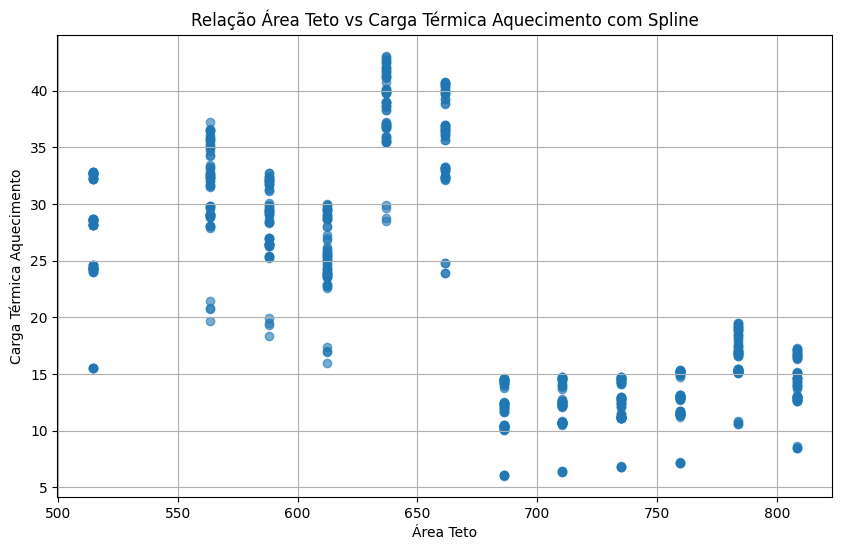

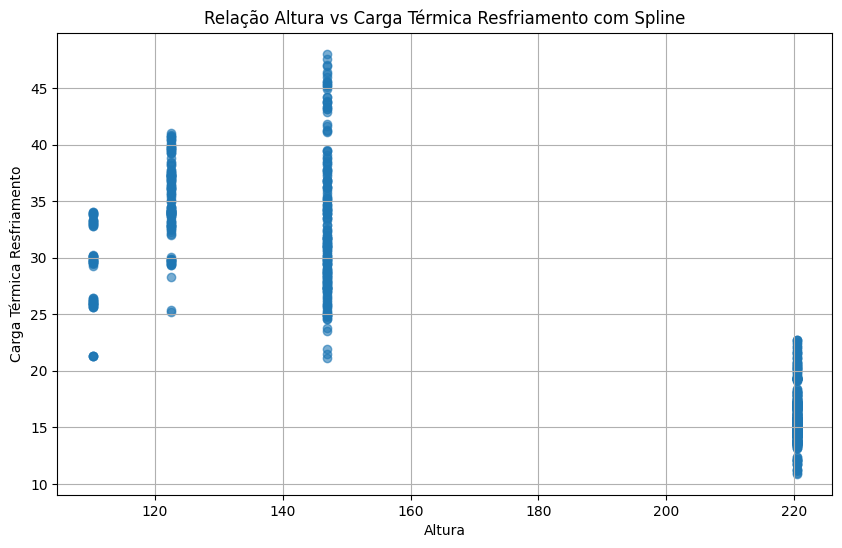

In [ ]:
# Modelagem com Splines
def plot_spline(feature, target):
    x = df[feature].values
    y = df[target].values

    idx = np.argsort(x)
    x = x[idx]
    y = y[idx]

    spline = splrep(x, y, s=0.5)
    x_new = np.linspace(x.min(), x.max(), 300)
    y_new = BSpline(*spline)(x_new)

    plt.figure(figsize=(10,6))
    plt.scatter(x, y, alpha=0.6)
    plt.plot(x_new, y_new, 'r-', lw=2)
    plt.title(f'Rela√ß√£o {feature} vs {target} com Spline')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
    plt.show()

plot_spline('√Årea Teto', 'Carga T√©rmica Aquecimento')
plot_spline('Altura', 'Carga T√©rmica Resfriamento')

Splines

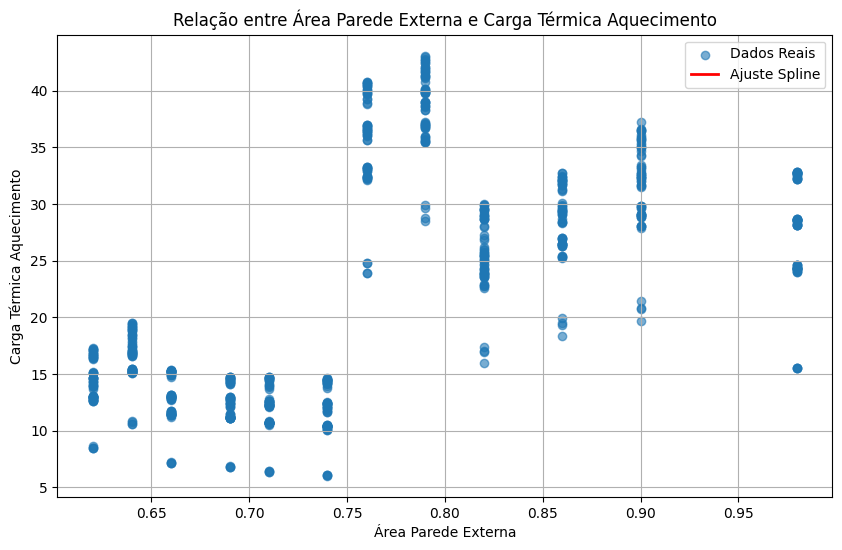

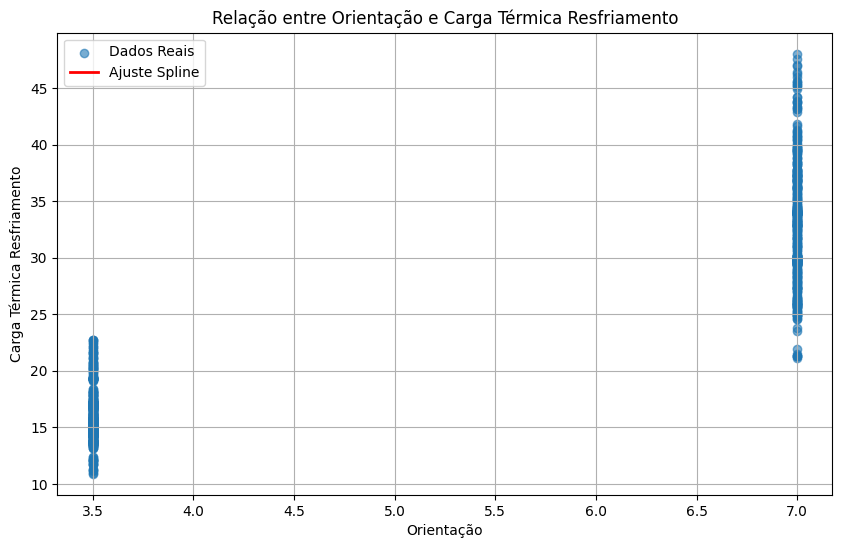

In [ ]:
# 6. Modelagem com Splines para Rela√ß√µes N√£o-Lineares
def plot_spline_relationship(feature, target):
    x = df[feature].values
    y = df[target].values

    # Ordenar os dados para spline
    sort_idx = np.argsort(x)
    x = x[sort_idx]
    y = y[sort_idx]

    # Ajuste do spline c√∫bico
    spline = splrep(x, y, s=0.5)
    x_new = np.linspace(x.min(), x.max(), 300)
    y_new = BSpline(*spline)(x_new)

    plt.figure(figsize=(10,6))
    plt.scatter(x, y, alpha=0.6, label='Dados Reais')
    plt.plot(x_new, y_new, 'r-', linewidth=2, label='Ajuste Spline')
    plt.title(f'Rela√ß√£o entre {feature} e {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.show()

# Aplicar para rela√ß√µes-chave
plot_spline_relationship('√Årea Parede Externa', 'Carga T√©rmica Aquecimento')
plot_spline_relationship('Orienta√ß√£o', 'Carga T√©rmica Resfriamento')